In [2]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() 

df_cleaned = df_cleaned.transpose()  

df_cleaned.iloc[:,100:150].mean()

ticker
CIF   -0.000655
CIK   -0.000433
CKH    0.000126
CL     0.000429
CLB    0.000216
CLF   -0.000818
CLI   -0.000068
CLS   -0.000422
CLX    0.000261
CMA   -0.000088
CMC   -0.000367
CMO    0.000260
CMS    0.000015
CMU   -0.000202
CNA   -0.000281
CNI    0.000469
CNX   -0.000159
COF    0.000173
COG   -0.000209
COO    0.000280
CP     0.000731
CPB    0.000412
CPE   -0.001512
CPK    0.000519
CPT    0.000417
CR     0.000122
CRD   -0.000044
CRK   -0.000932
CRS   -0.000167
CRY   -0.000265
CSL    0.000330
CSX    0.000335
CTB   -0.000081
CTS   -0.000365
CUB    0.000021
CUZ   -0.000051
CVS   -0.000046
CW     0.000433
CWT    0.000047
CX    -0.000911
CXE   -0.000320
D      0.000232
DBD   -0.000113
DCI    0.000730
DDF    0.000125
DDS   -0.000278
DE     0.000187
DHF    0.000002
DHI   -0.000560
DHR    0.000322
dtype: float64

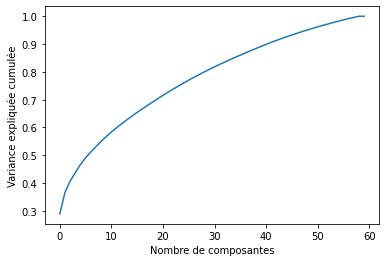

30


In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Étape 1 : Préparation des données
# Supposons que `X` est votre DataFrame
X=df_cleaned.iloc[3265+100*i:3265+100*i+lookback_window_length,:]
X_scaled = StandardScaler().fit_transform(X)

# Étape 2 : Application de PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Étape 3 : Analyse des valeurs propres
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

# Choisissez le nombre de composantes pour conserver 90% de la variance
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.80)[0][0] + 1
X_pca_reduced = X_pca[:, :n_components]
print(n_components)

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supposons que df_cleaned est votre DataFrame contenant les données de trading
# Normaliser les données
lookback_window_length = 60## we compute the optimal number of clusters for a lookback window of 30, 40, 50, ..., 130, 140, 150
iterations = 10
average_number_of_cluster = 0 
optimal_number_of_cluster = []

for i in range(iterations):
    df_normalized = (df_cleaned.iloc[3265+100*i:3265+100*i+lookback_window_length,:] - df_cleaned.iloc[3265+100*i:3265+100*i+lookback_window_length:,].mean()) / df_cleaned.iloc[3265+100*i:3265+100*i+lookback_window_length:,].std()

    df=df_normalized
    correlation_matrix = df.corr(method='pearson').values
    print(correlation_matrix.shape)
    # Calculer les valeurs propres de la matrice de corrélation
    eigenvalues, _ = np.linalg.eig(correlation_matrix)
    
    # Trier les valeurs propres par ordre décroissant
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]

    # Définir le pourcentage de variance à capturer
    P = 0.9  # par exemple 99%

    # Calculer la somme cumulée des valeurs propres et diviser par la somme totale
    cumulative_sum = np.cumsum(sorted_eigenvalues)
    total_variance = cumulative_sum[-1]
    proportion_variance = cumulative_sum / total_variance

    # Trouver le nombre de composantes nécessaires pour dépasser le seuil P
    k = np.argmax(proportion_variance >= P) + 1  # +1 car les indices en Python commencent à 0
    print(k)
    average_number_of_cluster += k/iterations
    
   

(663, 663)
44
(663, 663)
42
(663, 663)
43
(663, 663)
43
(663, 663)
38
(663, 663)
41
(663, 663)
43
(663, 663)
42
(663, 663)
42
(663, 663)
42


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import eigvalsh

# Supposons que df_cleaned est votre DataFrame contenant les données de trading
# Normaliser les données
lookback_window_length = np.arange(30, 160, 10) ## we compute the optimal number of clusters for a lookback window of 30, 40, 50, ..., 130, 140, 150
iterations = 50
average_number_of_cluster = 0 
optimal_number_of_cluster = []

for lookback_length in lookback_window_length:

    for i in range(iterations):
        df_normalized = (df_cleaned.iloc[:,100*i:100*i+lookback_length] - df_cleaned.iloc[:,100*i:100*i+lookback_length]  .mean()) / df_cleaned.iloc[:,100*i:100*i+lookback_length].std()

        df=df_normalized
        correlation_matrix = df.corr().values

        # Compute eigenvalues of the correlation matrix
        eigenvalues = eigvalsh(correlation_matrix)

        # Sort eigenvalues in descending order
        sorted_eigenvalues = np.sort(eigenvalues)[::-1]

        # Définir le pourcentage de variance à capturer
        P = 0.90  # par exemple 90%

        # Compute cumulative sum of eigenvalues
        cumulative_sum = np.cumsum(sorted_eigenvalues)

        # Find the number of eigenvalues needed to reach or exceed the threshold
        k = np.argmax(cumulative_sum / np.sum(sorted_eigenvalues) >= P) + 1

        k = min(k, correlation_matrix.shape[0])
        average_number_of_cluster += k/iterations
        
    ## round() : To round a number to the nearest integer, rounding down if the decimal is less than 0.5 and rounding up if the 
    ##           decimal is greater than or equal to 0.5

    print(f"nomber moyen de cluster {round(average_number_of_cluster)}") 
    optimal_number_of_cluster.append(round(average_number_of_cluster))


  


nomber moyen de cluster 24
nomber moyen de cluster 55
nomber moyen de cluster 93
nomber moyen de cluster 138
nomber moyen de cluster 190
nomber moyen de cluster 247
nomber moyen de cluster 311
nomber moyen de cluster 381
nomber moyen de cluster 457
nomber moyen de cluster 538
nomber moyen de cluster 624
nomber moyen de cluster 716
nomber moyen de cluster 813


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

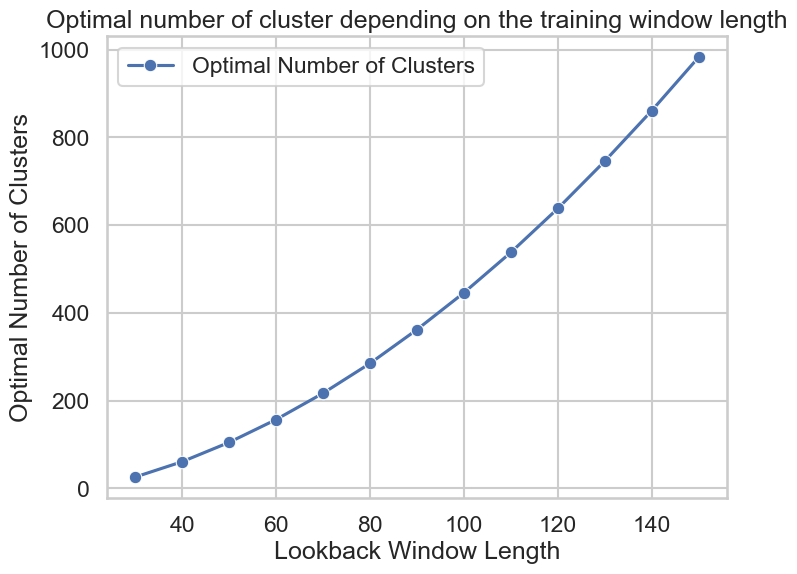

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de Seaborn
sns.set(style="whitegrid", context="talk")

# Tracé avec Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=lookback_window_length, y=optimal_number_of_cluster, marker='o', color='b', label='Optimal Number of Clusters')
plt.title('Optimal number of cluster depending on the training window length')
plt.xlabel('Lookback Window Length')
plt.ylabel('Optimal Number of Clusters')
plt.legend()
plt.show()


In [8]:
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)
PnL = [0.211, 0.2105, 0.197, 0.204, 0.218, 0.225, 0.217, 0.213, 0.214, 0.190, 0.212, 0.208, 0.209, 0.205, 0.212, 0.212, 0.208, 0.214, 0.204, 0.212]


(20, 20)

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


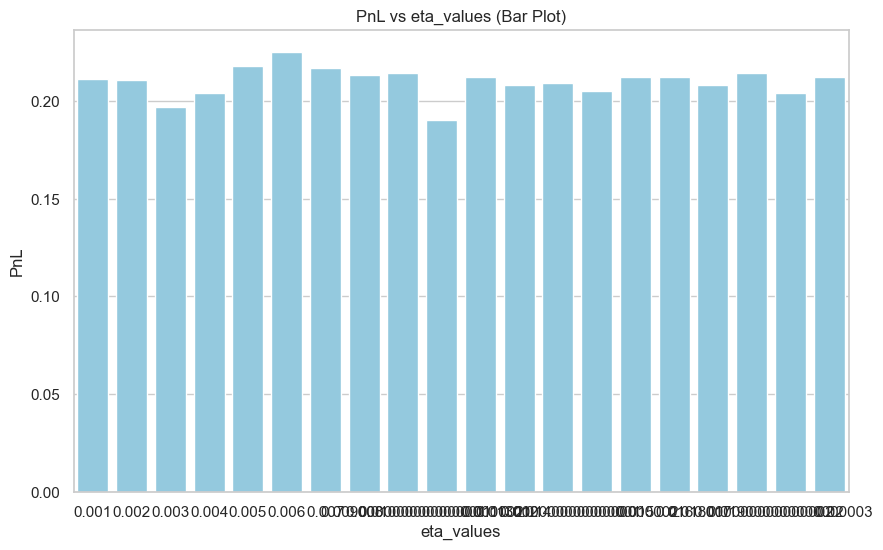

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided data
eta_values = np.linspace(0.001, 0.02, 20)
PnL = [0.211, 0.2105, 0.197, 0.204, 0.218, 0.225, 0.217, 0.213, 0.214, 0.190, 0.212, 0.208, 0.209, 0.205, 0.212, 0.212, 0.208, 0.214, 0.204, 0.212]

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='eta_values', y='PnL', data=df, color='skyblue')

# Set plot labels and title
plt.xlabel('eta_values')
plt.ylabel('PnL')
plt.title('PnL vs eta_values (Bar Plot)')

# Show the plot
plt.show()